In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def quantizeWeight(W,BW):
    Wq = np.minimum(np.round(W*np.power(2.0,BW-1.0))*np.power(2.0,1.0-BW),1.0-np.power(2.0,1.0-BW))
    return Wq

def quantizeInput(X,BX):
    return np.minimum(np.round(X*np.power(2.0,BX))*np.power(2.0,-BX) ,1.0-np.power(2.0,-BX))

In [3]:
#print(quantizeWeight(-0.4344,3))
print(quantizeInput(0.22222,3))

0.25


In [4]:
2**(6/4)


2.8284271247461903

In [5]:
def placeUniformLevels(M,c=2):
    #M is the number of levels
    return np.arange(-c,c+0.01,4.0/(M-1))

def getLloydMaxLevels(M,trials,c=2):
    levels = placeUniformLevels(M)
    for i in range(trials):
        thresholds = 0.5*(np.delete(levels,0)+np.delete(levels,M-1))
        for m in range(M):
            leftThreshold = c if m==0 else thresholds[m-1]
            rightThreshold = -c if m==(M-1) else thresholds[m]
            if (rightThreshold<0):
                num = rightThreshold**2/8*(rightThreshold/3+1) - leftThreshold**2/8*(leftThreshold/3+1)
                denum =  rightThreshold/4*(rightThreshold/4+1) - leftThreshold/4*(leftThreshold/4+1)
                levels[m] = np.true_divide(num,denum)
            elif (leftThreshold>0):
                num = rightThreshold**2/8*(1-rightThreshold/3) - leftThreshold**2/8*(1 - leftThreshold/3)
                denum = rightThreshold/4*(1-rightThreshold/4) - leftThreshold/4*(1 - leftThreshold/4) 
                levels[m] = np.true_divide(num,denum)
            else:
                num =   rightThreshold**2/8*(1-rightThreshold/3) - leftThreshold**2/8*(leftThreshold/3+1)
                denum =   rightThreshold/4*(1-rightThreshold/4) - leftThreshold/4*(leftThreshold/4+1)
                levels[m] = np.true_divide(num,denum)
    return levels
    

print('uniform levels:', placeUniformLevels(4))
print('Llyod-Max levels:',getLloydMaxLevels(4,100))

uniform levels: [-2.         -0.66666667  0.66666667  2.        ]
Llyod-Max levels: [ 1.17595679  0.35191294 -0.35190579 -1.17595257]


[[ 0.   0.5  0. ]
 [-2.   0.   2. ]]


c:\users\abhi kamboj\anaconda2\envs\tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: stem() got an unexpected keyword argument 'use_line_collection'. This will raise a TypeError in future versions.
  warnings.warn(message, mplDeprecation, stacklevel=1)


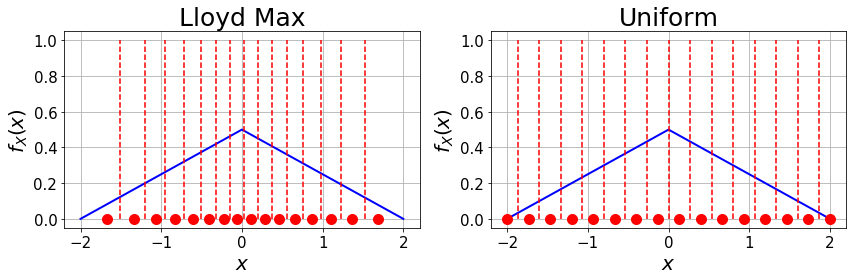

16 Levels
uniform levels: [-2.         -1.73333333 -1.46666667 -1.2        -0.93333333 -0.66666667
 -0.4        -0.13333333  0.13333333  0.4         0.66666667  0.93333333
  1.2         1.46666667  1.73333333  2.        ]
Llyod-Max levels: [ 1.68139122  1.36515378  1.10014565  0.86601057  0.65461377  0.46085012
  0.28048008  0.10952317 -0.05580425 -0.228189   -0.41144524 -0.60956951
 -0.82681402 -1.06832016 -1.34236148 -1.66986378]


In [6]:
triangle_dist = np.asarray([[0,.5,0],[-2,0,2]])
print(triangle_dist)
M=16
trials = 100
uniformLevels = placeUniformLevels(M)
uniformThresholds = 0.5*(np.delete(uniformLevels,0)+np.delete(uniformLevels,M-1))
LloydMaxLevels = getLloydMaxLevels(M,trials)
LloydMaxThresholds = 0.5*(np.delete(LloydMaxLevels,0)+np.delete(LloydMaxLevels,M-1))

plt.figure(figsize=(12,4))
ax=plt.subplot(121)
line1, = ax.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax.plot(LloydMaxLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax.stem(LloydMaxThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--',use_line_collection='True')

ax.grid()
ax.set_xlabel(r'$x$',fontsize=20)
ax.set_ylabel(r'$f_X(x)$',fontsize=20)
ax.tick_params(axis='both',labelsize=15)
ax.set_title('Lloyd Max',fontsize=25)

ax2=plt.subplot(122)
line1, = ax2.plot(triangle_dist[1,:],triangle_dist[0,:],label='Distribution',linewidth=2,color='b')
line2, = ax2.plot(uniformLevels,np.zeros(M),label='Quantization Levels',linewidth=0,color='r',marker='o',markersize=10)
line3 = ax2.stem(uniformThresholds,np.ones(M-1),basefmt=' ',markerfmt=' ',linefmt='r--',use_line_collection='True')
ax2.grid()
ax2.set_xlabel(r'$x$',fontsize=20)
ax2.set_ylabel(r'$f_X(x)$',fontsize=20)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_title('Uniform',fontsize=25)
plt.tight_layout()
plt.show()

print("16 Levels")
print('uniform levels:', placeUniformLevels(16))
print('Llyod-Max levels:',getLloydMaxLevels(16,100))

16 Quantization Levels
uniform quantizer sqnr: 20.283500642394493
lloyd max quantizer sqnr: 22.121540137215206


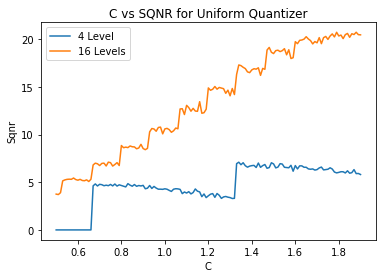

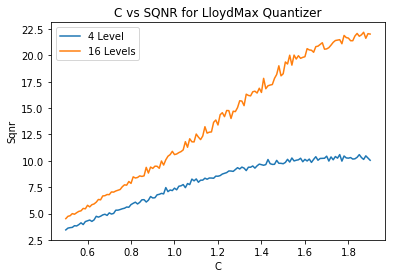

In [48]:
def evaluate_sqnr(Nsample,quantizationLevels):
    data = np.random.triangular(-2,0,2,Nsample)
    quantizedData = np.zeros(Nsample)
    for i in range(Nsample):
        quantizedData[i]=quantizationLevels[np.argmin(np.abs(data[i]-quantizationLevels))]
    SNR = 10*np.log10(np.true_divide(np.sum(np.var(data)),np.sum(np.var(data-quantizedData))))
    return SNR

Nsample=1000
M = 16
trials = 100
Cs= np.arange(.5,1.91,.01)
sqnrs_uni,sqnrs_LM = [[],[]],[[],[]]
for c in Cs:
    uniformLevels = placeUniformLevels(4,c)
    LloydMaxLevels = getLloydMaxLevels(4,trials,c)
    sqnrs_uni[0].append(evaluate_sqnr(Nsample,uniformLevels))
    sqnrs_LM[0].append(evaluate_sqnr(Nsample,LloydMaxLevels))
    
    uniformLevels = placeUniformLevels(16,c)
    LloydMaxLevels = getLloydMaxLevels(16,trials,c)
    sqnrs_uni[1].append(evaluate_sqnr(Nsample,uniformLevels))
    sqnrs_LM[1].append(evaluate_sqnr(Nsample,LloydMaxLevels))
    
plt.plot(np.transpose([Cs]*2),np.transpose(sqnrs_uni))
plt.legend(["4 Level","16 Levels"])
plt.xlabel("C")
plt.ylabel("Sqnr")
plt.title("C vs SQNR for Uniform Quantizer")

plt.figure()
plt.plot(np.transpose([Cs]*2),np.transpose(sqnrs_LM))
plt.legend(["4 Level","16 Levels"])
plt.xlabel("C")
plt.ylabel("Sqnr")
plt.title("C vs SQNR for LloydMax Quantizer")

#c_vs_sqnr.plot(Cs,sqnrs_LM)
print("16 Quantization Levels")
print('uniform quantizer sqnr:', evaluate_sqnr(Nsample,uniformLevels))
print('lloyd max quantizer sqnr:',evaluate_sqnr(Nsample,LloydMaxLevels))


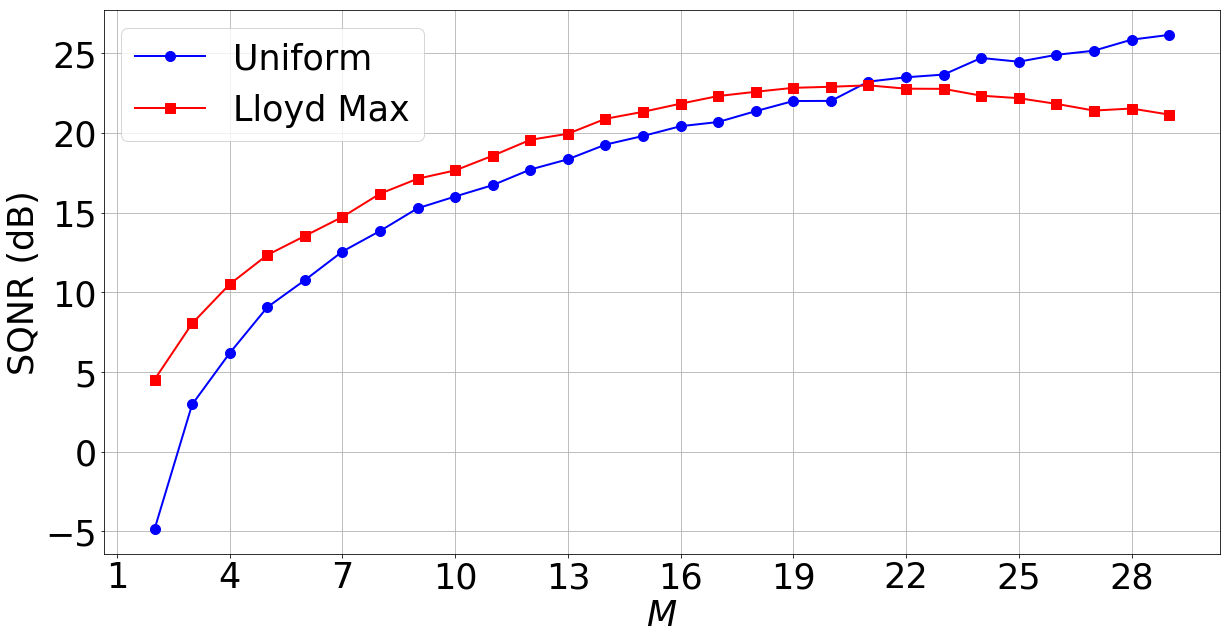

In [8]:
SQNR_uniform = []
SQNR_LM = []
Ms = []
Nsample=1000
trials = 100
for M in range(2,30):
    uniformLevels = placeUniformLevels(M)
    LloydMaxLevels = getLloydMaxLevels(M,trials)
    SQNR_uniform.append(evaluate_sqnr(Nsample,uniformLevels))
    SQNR_LM.append(evaluate_sqnr(Nsample,LloydMaxLevels))
    Ms.append(M)
    
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
line1, = ax.plot(Ms,SQNR_uniform,label='Uniform',linewidth=2,color='b',marker='o',markersize=10)
line2, = ax.plot(Ms,SQNR_LM,label='Lloyd Max',linewidth=2,color='r',marker='s',markersize=10)
plt.legend(handles=[line1,line2],loc=0,fontsize=35)
ax.grid()
ax.set_xlabel(r'$M$',fontsize=35)
ax.set_ylabel('SQNR (dB)',fontsize=35)
ax.tick_params(axis='both',labelsize=35)
ax.set_xticks(np.arange(1,30,3))
plt.show()

In [9]:
#line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
#plt.legend(loc=0,fontsize=20)
#line2, = ax.plot(BWs,SQNR_eval,label='Simulation',linewidth=2,color='r',marker='s',markersize=10)
#plt.legend(loc=0,fontsize=20
#ax.set_xticks(np.arange(1,20,2))

In [10]:
[np.arange(.5,1.91,.05)]*2
Cs= np.arange(.5,1.91,.01)
Cs


array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 ])